In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
import librosa 
from librosa.display import specshow
import tqdm 
%matplotlib inline

In [2]:
os.path.expanduser('~/Users/phinchosherpa/Desktop/nyu/BirdVox-DCASE-20k_csv-private.csv')
csv_path='/Users/phinchosherpa/Desktop/nyu/BirdVox-DCASE-20k_csv-private.csv'

In [3]:
df=pd.read_csv(csv_path)
df.head()

,Unit,Item start (s),Has bird,#Calls,UUID,Call timestamps (s)
0,unit01,0.100,0,0,857f7bac-58da-4d6c-a0c5-82bbdc7c518e,[]
1,unit01,12.598,0,0,1eacd200-b03d-4089-a6ae-8b9a95f06739,[]
2,unit01,22.698,0,0,9f8b9739-40a6-439f-aa22-caa42f9758ee,[]
3,unit01,35.196,0,0,f65c9917-f852-478f-aad0-dd91b720679e,[]
4,unit01,45.296,0,0,e7b31cd3-b2d3-4d01-af95-91f9ea27e856,[]


In [53]:
max_list=[]
n_required_calls=0
rows = df[df["#Calls"]==n_required_calls]

for row_id in tqdm.tqdm(range(100)):
    row = rows.iloc[row_id]
    uuid_str = row["UUID"]
    data_dir = '/Users/phinchosherpa/Desktop/nyu/wav'
    wav_path = os.path.join(data_dir, uuid_str + '.wav')
    y, sr = librosa.load(wav_path)
    n_fft = 256
    hop_length = 32
    stft= librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    spectral_flux=np.abs(np.diff(np.abs(stft),axis=1))
    max_list.append(np.max(spectral_flux))



100%|██████████| 100/100 [00:35<00:00,  2.75it/s]


In [63]:
max_list2=[]
#n_required_calls2>=10
rows2 = df[df["#Calls"]>=10]

for row_id2 in tqdm.tqdm(range(100)):
    row2 = rows2.iloc[row_id2]
    uuid_str2 = row2["UUID"]
    data_dir2 = '/Users/phinchosherpa/Desktop/nyu/wav'
    wav_path2 = os.path.join(data_dir2, uuid_str2 + '.wav')
    y2, sr = librosa.load(wav_path2)
    n_fft = 256
    hop_length = 32
    stft= librosa.stft(y2, n_fft=n_fft, hop_length=hop_length)
    spectral_flux2=np.abs(np.diff(np.abs(stft),axis=1))
    max_list2.append(np.max(spectral_flux2))

100%|██████████| 100/100 [00:37<00:00,  2.66it/s]


(array([ 0.,  0.,  0.,  0.,  4.,  7., 10., 14., 28., 21.,  9.,  3.,  3.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 24 Patch objects>)

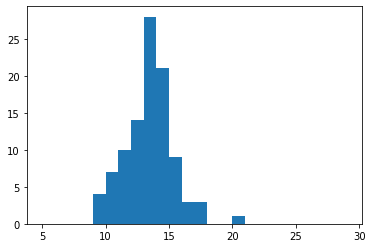

In [77]:
plt.hist(max_list, bins=range(5, 30))

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  3.,  4.,  4.,  7., 13., 14., 18.,
        14.,  3.,  6.,  7.,  2.,  2.,  0.,  0.,  1.,  0.,  0.]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 24 Patch objects>)

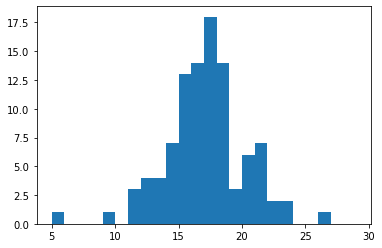

In [78]:
plt.hist(max_list2, bins=range(5,30))

In [131]:
summarized_feat_list=[]
for row_id in tqdm.tqdm(range(100)):
    row = rows.iloc[row_id]
    uuid_str = row["UUID"]
    data_dir = '/Users/phinchosherpa/Desktop/nyu/wav'
    wav_path = os.path.join(data_dir, uuid_str + '.wav')
    y, sr = librosa.load(wav_path)
    n_fft = 256
    hop_length = 32
    stft= librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    fft_frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    fmin = 1000 # in Hertz
    fmax = 11000 # in Hertz
    bin_start = np.where(fft_frequencies>fmin)[0][0]
    bin_stop = np.where(fft_frequencies<fmax)[0][-1]
    features = np.abs(np.diff(np.abs(stft),axis=1))
    cropped_features = features[bin_start:bin_stop, :]
    summarized_features = np.max(cropped_features, axis=1)
    summarized_feat_list.append(summarized_features)


100%|██████████| 100/100 [00:37<00:00,  2.62it/s]

Text(0, 0.5, 'Spectral flux')

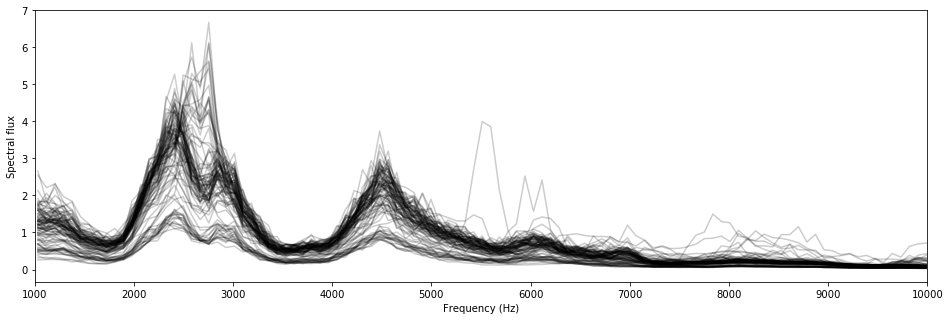

In [147]:
plt.figure(figsize=(16, 5))
plt.plot(
    librosa.fft_frequencies(sr=sr, n_fft=n_fft)[bin_start:bin_stop],
    np.array(summarized_feat_list).T,
    alpha=0.2, color='k');
plt.xlim(1000, 10000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral flux")



In [148]:
summarized_feat_list2=[]
for row_id in tqdm.tqdm(range(100)):
    row = rows2.iloc[row_id]
    uuid_str = row["UUID"]
    data_dir = '/Users/phinchosherpa/Desktop/nyu/wav'
    wav_path = os.path.join(data_dir, uuid_str + '.wav')
    y, sr = librosa.load(wav_path)
    n_fft = 256
    hop_length = 32
    stft= librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
    fft_frequencies = librosa.fft_frequencies(sr=sr, n_fft=n_fft)
    fmin = 1000 # in Hertz
    fmax = 11000 # in Hertz
    bin_start = np.where(fft_frequencies>fmin)[0][0]
    bin_stop = np.where(fft_frequencies<fmax)[0][-1]
    features = np.abs(np.diff(np.abs(stft),axis=1))
    cropped_features = features[bin_start:bin_stop, :]
    summarized_features = np.max(cropped_features, axis=1)
    summarized_feat_list2.append(summarized_features)


100%|██████████| 100/100 [00:38<00:00,  2.57it/s]

Text(0, 0.5, 'Spectral flux')

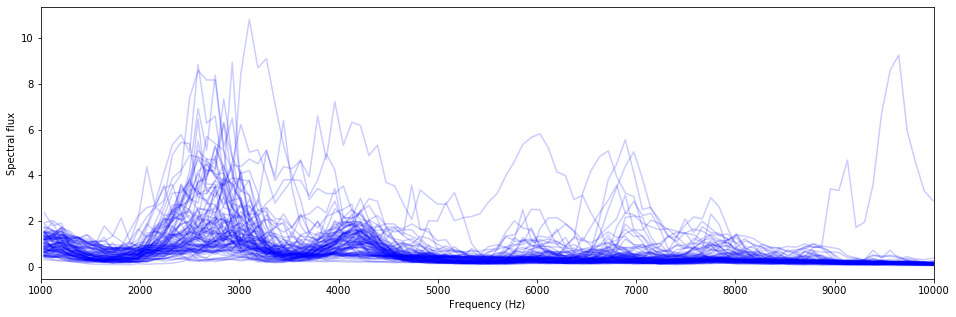

In [149]:
plt.figure(figsize=(16, 5))
plt.plot(
    librosa.fft_frequencies(sr=sr, n_fft=n_fft)[bin_start:bin_stop],
    np.array(summarized_feat_list2).T,
    alpha=0.2, color='b');
plt.xlim(1000, 10000)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral flux")



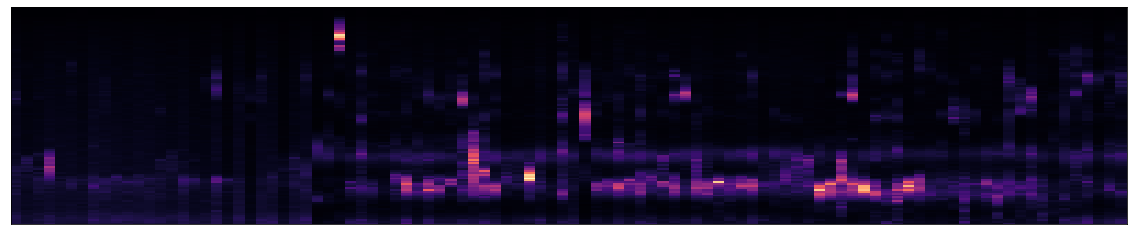

In [161]:
plt.figure(figsize=(20, 4))
specshow(np.array(summarized_feat_list2).T)
plt.clim(0, 10)

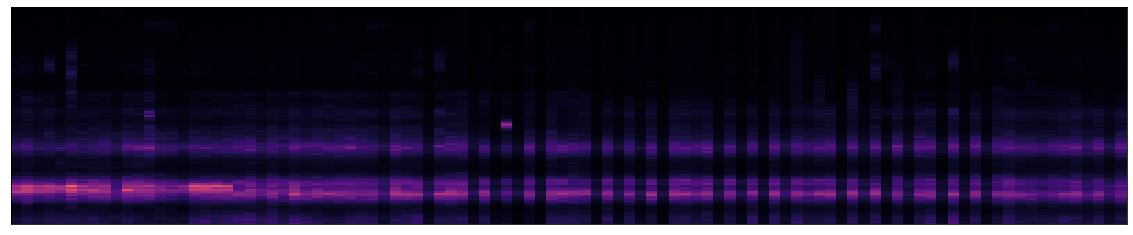

In [162]:
plt.figure(figsize=(20, 4))
specshow(np.array(summarized_feat_list).T)
plt.clim(0, 10)

In [166]:
100 * 10 / 38

26.31578947368421